# Task 4.9 Data Visualization - Part 2

#### Question 1: Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data¶

        Import Libraries and Datasets

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# importing dataset
df = pd.read_pickle(r'C:\Users\there\Desktop\Career Foundry\06.2022 Instacart Basket Analysis\02 - Data\Prepared Data\4.9_full_merge.pkl')

In [5]:
# viewing output
df.head()

,order_id,customer_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Most Orders,first_name,last_name,gender,state,age,date_joined,#_of_dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Average Orders,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Average Orders,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Most Orders,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Average Orders,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Most Orders,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
# checking number of rows/columns in df
df.shape

(32406041, 29)

In [7]:
# viewing information to see what data we can extract for charts.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32406041 entries, 0 to 32406040
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   customer_id             int64   
 2   eval_set                object  
 3   order_number            int64   
 4   order_day_of_week       int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  Unnamed: 0              int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  _merge                  category
 16  price_range_loc         object  
 17  Busiest day             object  
 18  Busiest days            object  
 19  Most Orders             object  
 20  first_name              object  
 21  last_n

#### Question 2: Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

    Bar Chart - Frequency of Orders by Day of Week

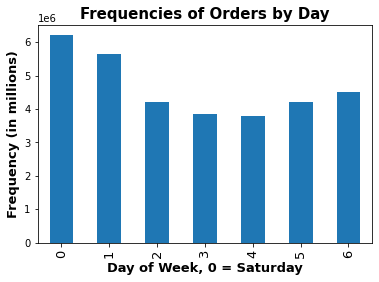

In [37]:
# create bar chart
Orders_by_day_bar = df['order_day_of_week'].value_counts().sort_index().plot.bar()
plt.xlabel('Day of Week, 0 = Saturday', fontsize = 13, fontweight = 'bold')
plt.ylabel('Frequency (in millions)', fontsize = 13, fontweight = 'bold')
plt.title('Frequencies of Orders by Day', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize=13)
plt.show()

    Results: Saturday is the busiest day followed by Sunday, then Friday.  Tuesday and Wednesday are the slowest days.

    Histogram Chart - Frequency of Orders by Hour

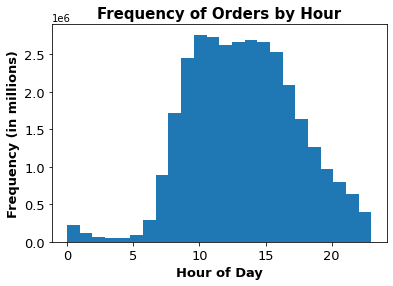

In [38]:
# create histogram
orders_by_hour_hist = df['order_hour_of_day'].plot.hist(bins=24)
plt.xlabel('Hour of Day', fontsize=13, fontweight='bold')
plt.ylabel('Frequency (in millions)', fontsize=13, fontweight='bold')
plt.title('Frequency of Orders by Hour', fontsize=15, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [11]:
# verifying results from the chart
df['order_hour_of_day'].value_counts()

10    2761862
11    2736242
14    2689251
15    2662246
13    2661057
12    2618613
16    2535313
9     2454273
17    2087721
8     1718182
18    1636566
19    1258352
20     976182
7      891082
21     795658
22     634247
23     402335
6      290500
0      218786
1      115706
5       87964
2       69377
4       53245
3       51281
Name: order_hour_of_day, dtype: int64

    Results: Most orders are placed between 8am - and 7pm, with the bulk of the orders between 10am and 11am. With the least busy hour being 3am. 

    Scatterplot - Checking to see if there is a correlation between age and price items bought

<AxesSubplot:xlabel='age', ylabel='prices'>

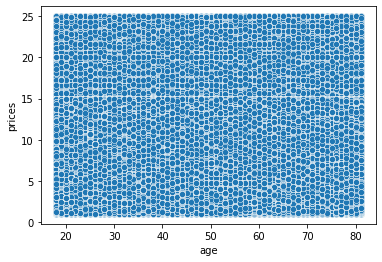

In [12]:
#create scatterplot
sns.scatterplot (x = 'age', y = 'prices', data = df)

    Results: There is no correlation between age and price of item being bought. 

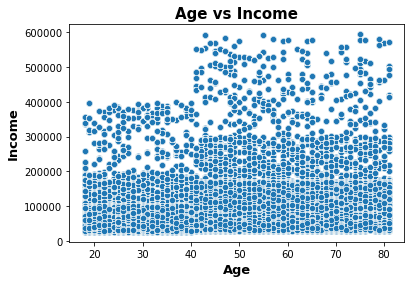

In [39]:
#creating another scatterplot with more of a correlation
age_vs_income_splot = sns.scatterplot (x = 'age', y = 'income', data = df)
plt.title('Age vs Income', fontweight='bold', fontsize = 15)
plt.xlabel('Age', fontsize=13, fontweight = 'bold')
plt.ylabel('Income', fontsize=13, fontweight = 'bold')
plt.show()

    Results: The majority customers are Regulars who have a max order greater than 10, but less than or equal to 40. 
            * The second rank is a Loyal Customer with more than 40 orders.
            * The least amount of customers are New Customers with 10 orders or less. 
            ** The data shows that most Instacart customers are returning customers with repeat orders. 

#### Line Chart - Average Price of Items Bought Throught Week

    Creating subste for line chart.

In [14]:
# set the seed
np.random.seed(4)

In [15]:
# create the list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(df)) <= 0.7

In [16]:
# store 70% of the sample in the dataframe big
big = df[dev]

In [17]:
# store 30% of the sample in the dataframe small
small = df[~dev]

In [18]:
# checking the small and large dataframe to ensure that it totals the df dataframe (32406041)
len(small) + len(big)

32406041

    Create line chart - Average Prices of Items Bought by Day of Week

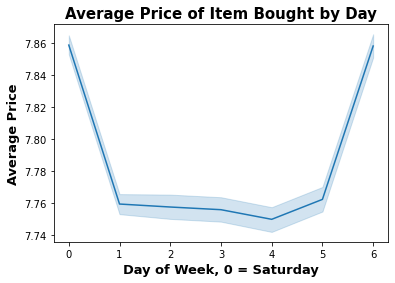

In [19]:
#creating line chart
line1 = sns.lineplot(data = small, x = 'order_day_of_week', y = 'prices')
plt.xlabel('Day of Week, 0 = Saturday', fontsize = 13, fontweight = 'bold')
plt.ylabel('Average Price', fontsize = 13, fontweight = 'bold')
plt.title('Average Price of Item Bought by Day', fontsize = 15, fontweight = 'bold')
plt.show()

    Results:  People buy more expensive items on Friday and Saturday.  Less expensive items are purchased during the week. 
        * There is a slight difference between the graphs from the large dataframe and small dataframe.  The small data frame shows a slightly larger dip on day 4 compared to the large df.  And the large df showed more of a dip on day 2.  Overall the findings were consistent. 

#### Question 4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column. 

In [20]:
#checking out price_range_loc column
df['loyalty_flag'].info

KeyError: 'loyalty_flag'

Missing loyalty_flag columm. Will need to import from task 4.8 and add loyalty_flag column

In [21]:
# import dataset from 4.8
df4_8 = pd.read_pickle(r'C:\Users\there\Desktop\Career Foundry\06.2022 Instacart Basket Analysis\02 - Data\Prepared Data\4.8_orders_products_merged.pkl')

In [22]:
# checking output
df4_8.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,Busiest day,Busiest days,Most Orders,max_order,loyalty_flag,avg_price,spending_flag,median_order_duration,frequency_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Mid-range product,Regularly busy,Regular days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer


In [23]:
# adding column loyalty flag to df dataframe
df['loyalty_flag'] = df4_8['loyalty_flag']

In [24]:
# rechecking output
df.head()

,order_id,customer_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,#_of_dependants,marital_status,income,loyalty_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,New Customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,New Customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,New Customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,New Customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,New Customer


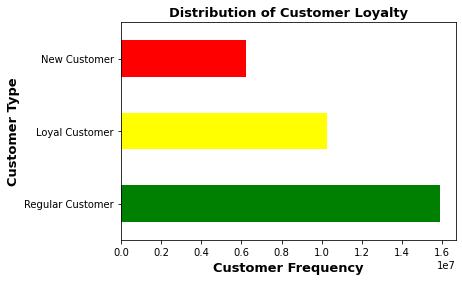

In [25]:
# creating bar chart with loyalty flag
bar2 = df['loyalty_flag'].value_counts().plot.barh(color = ['green','yellow', 'red'])
plt.xlabel('Customer Frequency', fontsize=13, fontweight = 'bold')
plt.ylabel('Customer Type', fontsize=13, fontweight = 'bold')
plt.title('Distribution of Customer Loyalty', fontsize=13, fontweight='bold')
plt.show()

    Results:  The majority customers are Regular who have a max order of greater than 10, but less than or equal to 40. 
            * The second rank is a Loyal Customer with more than 40 orders.
            * The least amount of customers are New Customers with 10 orders or less. 
            ** The data shows that most Instacart customers are returning customers with repeat orders. 

#### Question 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

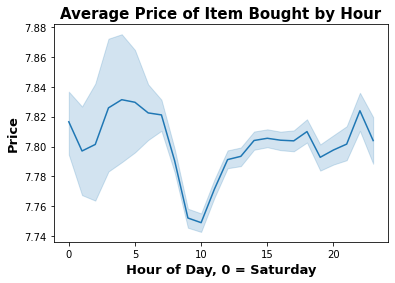

In [26]:
#creating line chart with large subset
line2 = sns.lineplot(data = big, x = 'order_hour_of_day', y = 'prices')
plt.xlabel('Hour of Day, 0 = Saturday', fontsize = 13, fontweight = 'bold')
plt.ylabel('Price', fontsize = 13, fontweight = 'bold')
plt.title('Average Price of Item Bought by Hour', fontsize = 15, fontweight = 'bold')
plt.show()

In [27]:
# using subset from above, selecting prices and order hour of the day only for dataframe
dfsmall = small[['order_hour_of_day','prices']]
dfbig = big[['order_hour_of_day','prices']]

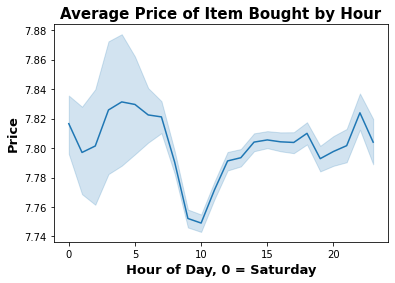

In [28]:
#recreating line chart with large subset
line3 = sns.lineplot(data = dfbig, x = 'order_hour_of_day', y = 'prices')
plt.xlabel('Hour of Day, 0 = Saturday', fontsize = 13, fontweight = 'bold')
plt.ylabel('Price', fontsize = 13, fontweight = 'bold')
plt.title('Average Price of Item Bought by Hour', fontsize = 15, fontweight = 'bold')
plt.show()

    Results: Most people tend to buy the most expensive items during the evening and early morning between roughly 11pm - 5am. 
    * People buy the least expensive items about 10am. 
    * The largest drop in purchase price is between about 6am - 10am, with 10am being the lowest priced hour.    

#### Question 6: Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents. 

In [30]:
# creating a new dataframe with only the columns needed from the small dataset.  
dfsmall2 = small[['age', '#_of_dependants']]

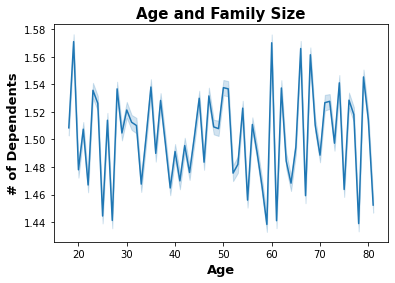

In [36]:
#creating a line chart to show connection between age and # of dependants. 
line4 = sns.lineplot(data = dfsmall2, x = 'age', y = '#_of_dependants')
plt.xlabel('Age', fontsize = 13, fontweight = 'bold')
plt.ylabel('# of Dependents', fontsize = 13, fontweight = 'bold')
plt.title('Age and Family Size', fontsize = 15, fontweight = 'bold')
plt.show()

    Results:  The range of the # of dependents is very small (1.44 - 1.58).  Since dependents themselves are counted in whole numbers, this indicates there is not much of a correlation between age and family size. 

#### Question 7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


    Results:  Please see Input line 13 for this scatterplot and the markdown cell below it for the results. 

#### Question 8: Export your visualizations as “.png” files in your relevant project folder.

In [43]:
Orders_by_day_bar.figure.savefig(r'C:\Users\there\Desktop\Career Foundry\06.2022 Instacart Basket Analysis\04 - Analysis\Visualizations\4.9_orders_by_day.png')

In [44]:
orders_by_hour_hist.figure.savefig(r'C:\Users\there\Desktop\Career Foundry\06.2022 Instacart Basket Analysis\04 - Analysis\Visualizations\4.9_orders_by_hour.png')

In [45]:
age_vs_income_splot.figure.savefig(r'C:\Users\there\Desktop\Career Foundry\06.2022 Instacart Basket Analysis\04 - Analysis\Visualizations\4.9_age_vs_income.png')

In [46]:
line1.figure.savefig(r'C:\Users\there\Desktop\Career Foundry\06.2022 Instacart Basket Analysis\04 - Analysis\Visualizations\4.9_priceitem_by_day.png')

In [47]:
bar2.figure.savefig(r'C:\Users\there\Desktop\Career Foundry\06.2022 Instacart Basket Analysis\04 - Analysis\Visualizations\4.9_customer_loyalty.png')

In [49]:
line3.figure.savefig(r'C:\Users\there\Desktop\Career Foundry\06.2022 Instacart Basket Analysis\04 - Analysis\Visualizations\4.9_priceitem_by_hour.png')

In [50]:
line4.figure.savefig(r'C:\Users\there\Desktop\Career Foundry\06.2022 Instacart Basket Analysis\04 - Analysis\Visualizations\4.9_age_vs_familysize.png')